<a href="https://colab.research.google.com/github/czeacach/fashion_designers/blob/main/Analyse_nationalit%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des nationalités et leur évolution dans le temps

Dans ce carnet est proposée une analyse de la place des nationalités sous forme de présences dans les aires géographiques en fonction du temps.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [ ]:
### Librairies déjà installées avec Python
import pprint
import sqlite3 as sql

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
pip install fanalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
from fanalysis.ca import CA
from fanalysis.mca import MCA

# importer les données à analyser


In [ ]:
### Se connecter à la base de données dans laquelle on va insérer
# le résultat de la requête SPARQL
#chemin d'acces de la base de données directement connectée à l'ordinateur via Google Drive Desktop
'/content/drive/MyDrive/dossier de travail/fashion_designers_data_analysis.db'
cn = sql.connect('/content/drive/MyDrive/dossier de travail/fashion_designers_data_analysis.db')
cn

In [ ]:
### Créer la requête SQL et inspecter le résultat
# Noter les jointures entre les différentes tables
q = """
SELECT
    wp.personUri,
    wp.personLabel,
    MIN(wp.genderUri) AS gender,
    MIN(wp.birthYear) AS birthYear,
    GROUP_CONCAT(DISTINCT TRIM(wn.nationalityLabel)) AS nationalityLabels,
    GROUP_CONCAT(DISTINCT TRIM(wc.continentLabel)) AS continentLabels,
    GROUP_CONCAT(DISTINCT TRIM(er.europe_regionLabel)) AS europeRegionLabels
FROM
    wdt_person_nationality wpo
JOIN
    wdt_personne wp ON wp.personUri = wpo.personUri
JOIN
    wdt_nationality wn ON wpo.nationalityUri = wn.nationalityUri
JOIN
    continents wc ON wn.fk_continent = wc.pk_continent
LEFT JOIN
    europe_regions er ON er.pk_europe_region = wn.fk_europe_region
GROUP BY
    wp.personUri, wp.personLabel;
        """
cur = cn.cursor()
r = cur.execute(q).fetchall()

# Créer le tableau à analyser

In [ ]:
### On transforme la liste en DataFrame

df_p = pd.DataFrame(r, columns=['person_uri', 'person_label',
                        'genderUri', 'birthYear', 'nationalités', 'continents', 'europe_regions'])
df_p = df_p.set_index('person_uri',drop=True)

df_p.head()

,person_label,genderUri,birthYear,nationalités,continents,europe_regions
person_uri,,,,,,
http://www.wikidata.org/entity/Q100324415,Estrella Rivas Franco,http://www.wikidata.org/entity/Q6581072,1921,spain,Europe,southern_europe
http://www.wikidata.org/entity/Q100462257,Ina Trifonova,http://www.wikidata.org/entity/Q6581072,1981,bulgaria,Europe,eastern_europe
http://www.wikidata.org/entity/Q101085725,Abbas Kaijuka,http://www.wikidata.org/entity/Q6581097,1989,uganda,Africa,None
http://www.wikidata.org/entity/Q101611457,Dennis Klaverweide,http://www.wikidata.org/entity/Q6581097,1990,kingdom of the netherlands,Europe,western_europe
http://www.wikidata.org/entity/Q101627961,Sepehr Maghsoudi,http://www.wikidata.org/entity/Q6581097,1982,kingdom of the netherlands,Europe,western_europe


## Codage par périodes de cinquante ans

In [ ]:
### On transforme le type de valeur de la colonne BirthYear
# de objet à entier
df_p['birthYear'] = df_p['birthYear'].astype(int)

In [ ]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias)
cdf_p = df_p.copy(deep=True)
cdf_p.head(3)

,person_label,genderUri,birthYear,nationalités,continents,europe_regions
person_uri,,,,,,
http://www.wikidata.org/entity/Q100324415,Estrella Rivas Franco,http://www.wikidata.org/entity/Q6581072,1921,spain,Europe,southern_europe
http://www.wikidata.org/entity/Q100462257,Ina Trifonova,http://www.wikidata.org/entity/Q6581072,1981,bulgaria,Europe,eastern_europe
http://www.wikidata.org/entity/Q101085725,Abbas Kaijuka,http://www.wikidata.org/entity/Q6581097,1989,uganda,Africa,None


In [ ]:
# Ajout de colonnes avec des listes
df_p['l_nationalités'] = df_p['nationalités'].apply(lambda x: x.split(',') if x else [])
df_p['l_continents'] = df_p['continents'].apply(lambda x: x.split(',') if x else [])
df_p['l_europe_regions'] = df_p['europe_regions'].apply(lambda x: x.split(',') if x else [])

# Ajout de colonnes avec le nombre d'éléments dans les listes
df_p['length_l_nationalités'] = df_p['l_nationalités'].apply(len)
df_p['length_l_continents'] = df_p['l_continents'].apply(len)
df_p['length_l_europe_regions'] = df_p['l_europe_regions'].apply(len)

df_p.tail()

,person_label,genderUri,birthYear,nationalités,continents,europe_regions,l_nationalités,l_continents,l_europe_regions,length_l_nationalités,length_l_continents,length_l_europe_regions
person_uri,,,,,,,,,,,,
http://www.wikidata.org/entity/Q99478791,Iveta Karklina-Viksne,http://www.wikidata.org/entity/Q6581072,1970,latvia,Europe,northern_europe,[latvia],[Europe],[northern_europe],1,1,1
http://www.wikidata.org/entity/Q99529091,Nelson Enwerem,http://www.wikidata.org/entity/Q6581097,1995,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0
http://www.wikidata.org/entity/Q99572935,Adejoke Lasisi,http://www.wikidata.org/entity/Q6581072,1986,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0
http://www.wikidata.org/entity/Q99578171,Gerhard Weber,http://www.wikidata.org/entity/Q6581097,1941,germany,Europe,western_europe,[germany],[Europe],[western_europe],1,1,1
http://www.wikidata.org/entity/Q99615223,Yemi Osunkoya,http://www.wikidata.org/entity/Q6581097,1969,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0


In [ ]:
### Créer neuf périodes
l_per = [1801, 1826, 1851, 1876, 1901, 1926, 1951, 1976, 2001]

In [ ]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

df_p['periodes'] = pd.cut(df_p['birthYear'], l_per, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
df_p['periodes'] = df_p['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
df_p.head(3)

,person_label,genderUri,birthYear,nationalités,continents,europe_regions,l_nationalités,l_continents,l_europe_regions,length_l_nationalités,length_l_continents,length_l_europe_regions,periodes
person_uri,,,,,,,,,,,,,
http://www.wikidata.org/entity/Q100324415,Estrella Rivas Franco,http://www.wikidata.org/entity/Q6581072,1921,spain,Europe,southern_europe,[spain],[Europe],[southern_europe],1,1,1,1901-1925
http://www.wikidata.org/entity/Q100462257,Ina Trifonova,http://www.wikidata.org/entity/Q6581072,1981,bulgaria,Europe,eastern_europe,[bulgaria],[Europe],[eastern_europe],1,1,1,1976-2000
http://www.wikidata.org/entity/Q101085725,Abbas Kaijuka,http://www.wikidata.org/entity/Q6581097,1989,uganda,Africa,None,[uganda],[Africa],[],1,1,0,1976-2000


# Pour pouvoir réaliser le tableau de contingence --> nécessité de choisir une seule nationalité

In [ ]:
# Sélectionner le premier élément de chaque liste dans la colonne 'l_continents'
first_continent = df_p['l_continents'].str[0]
first_nationality = df_p['l_nationalités'].str[0]

# Créer un nouveau DataFrame avec la première nationalité uniquement
df_p_first_continent = df_p.copy()  # Faire une copie du DataFrame original
df_p_first_continent['first_continent'] = first_continent  # Ajouter la colonne 'first_continent'
df_p_first_continent['first_nationality'] = first_nationality # Ajouter la colonne 'first_nationality'


# Inspection
df_p_first_continent.tail()

,person_label,genderUri,birthYear,nationalités,continents,europe_regions,l_nationalités,l_continents,l_europe_regions,length_l_nationalités,length_l_continents,length_l_europe_regions,periodes,first_continent,first_nationality
person_uri,,,,,,,,,,,,,,,
http://www.wikidata.org/entity/Q99478791,Iveta Karklina-Viksne,http://www.wikidata.org/entity/Q6581072,1970,latvia,Europe,northern_europe,[latvia],[Europe],[northern_europe],1,1,1,1951-1975,Europe,latvia
http://www.wikidata.org/entity/Q99529091,Nelson Enwerem,http://www.wikidata.org/entity/Q6581097,1995,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1976-2000,Africa,nigeria
http://www.wikidata.org/entity/Q99572935,Adejoke Lasisi,http://www.wikidata.org/entity/Q6581072,1986,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1976-2000,Africa,nigeria
http://www.wikidata.org/entity/Q99578171,Gerhard Weber,http://www.wikidata.org/entity/Q6581097,1941,germany,Europe,western_europe,[germany],[Europe],[western_europe],1,1,1,1926-1950,Europe,germany
http://www.wikidata.org/entity/Q99615223,Yemi Osunkoya,http://www.wikidata.org/entity/Q6581097,1969,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1951-1975,Africa,nigeria


In [ ]:
# Sélectionner le premier élément de chaque liste dans la colonne 'l_europe_regions'
first_europe_region = df_p['l_europe_regions'].str[0]

# Créer un nouveau DataFrame avec la première nationalité uniquement
df_p_world_region = df_p.copy()  # Faire une copie du DataFrame original

df_p_world_region['first_continent'] = first_continent  # Ajouter la colonne 'first_continent'

df_p_world_region['first_europe_region'] = first_europe_region  # Ajouter la colonne 'first_europe_region'


# Inspection
df_p_world_region.tail()

,person_label,genderUri,birthYear,nationalités,continents,europe_regions,l_nationalités,l_continents,l_europe_regions,length_l_nationalités,length_l_continents,length_l_europe_regions,periodes,first_continent,first_europe_region
person_uri,,,,,,,,,,,,,,,
http://www.wikidata.org/entity/Q99478791,Iveta Karklina-Viksne,http://www.wikidata.org/entity/Q6581072,1970,latvia,Europe,northern_europe,[latvia],[Europe],[northern_europe],1,1,1,1951-1975,Europe,northern_europe
http://www.wikidata.org/entity/Q99529091,Nelson Enwerem,http://www.wikidata.org/entity/Q6581097,1995,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1976-2000,Africa,NaN
http://www.wikidata.org/entity/Q99572935,Adejoke Lasisi,http://www.wikidata.org/entity/Q6581072,1986,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1976-2000,Africa,NaN
http://www.wikidata.org/entity/Q99578171,Gerhard Weber,http://www.wikidata.org/entity/Q6581097,1941,germany,Europe,western_europe,[germany],[Europe],[western_europe],1,1,1,1926-1950,Europe,western_europe
http://www.wikidata.org/entity/Q99615223,Yemi Osunkoya,http://www.wikidata.org/entity/Q6581097,1969,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1951-1975,Africa,NaN


In [ ]:
## création d'une fonction pour sélectionner les régions à analyser, en affinant l'Europe

def determine_world_region(row):
    if row['first_continent'] == 'Europe':
        return row['first_europe_region']
    else:
        return row['first_continent']

# Appliquer la fonction à chaque ligne du DataFrame
df_p_world_region['world_region'] = df_p_world_region.apply(determine_world_region, axis=1)

# Inspection
df_p_world_region.tail()

,person_label,genderUri,birthYear,nationalités,continents,europe_regions,l_nationalités,l_continents,l_europe_regions,length_l_nationalités,length_l_continents,length_l_europe_regions,periodes,first_continent,first_europe_region,world_region
person_uri,,,,,,,,,,,,,,,,
http://www.wikidata.org/entity/Q99478791,Iveta Karklina-Viksne,http://www.wikidata.org/entity/Q6581072,1970,latvia,Europe,northern_europe,[latvia],[Europe],[northern_europe],1,1,1,1951-1975,Europe,northern_europe,northern_europe
http://www.wikidata.org/entity/Q99529091,Nelson Enwerem,http://www.wikidata.org/entity/Q6581097,1995,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1976-2000,Africa,NaN,Africa
http://www.wikidata.org/entity/Q99572935,Adejoke Lasisi,http://www.wikidata.org/entity/Q6581072,1986,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1976-2000,Africa,NaN,Africa
http://www.wikidata.org/entity/Q99578171,Gerhard Weber,http://www.wikidata.org/entity/Q6581097,1941,germany,Europe,western_europe,[germany],[Europe],[western_europe],1,1,1,1926-1950,Europe,western_europe,western_europe
http://www.wikidata.org/entity/Q99615223,Yemi Osunkoya,http://www.wikidata.org/entity/Q6581097,1969,nigeria,Africa,None,[nigeria],[Africa],[],1,1,0,1951-1975,Africa,NaN,Africa


In [ ]:
df_p_world_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, http://www.wikidata.org/entity/Q100324415 to http://www.wikidata.org/entity/Q99615223
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   person_label             2856 non-null   object  
 1   genderUri                2856 non-null   object  
 2   birthYear                2856 non-null   int64   
 3   nationalités             2856 non-null   object  
 4   continents               2856 non-null   object  
 5   europe_regions           1565 non-null   object  
 6   l_nationalités           2856 non-null   object  
 7   l_continents             2856 non-null   object  
 8   l_europe_regions         2856 non-null   object  
 9   length_l_nationalités    2856 non-null   int64   
 10  length_l_continents      2856 non-null   int64   
 11  length_l_europe_regions  2856 non-null   int64   
 12  periodes                 2856 non-null   catego

In [ ]:
# Supprimer les colonnes pas nécessaires
df_p_world_region.drop(columns=['continents','europe_regions', 'l_europe_regions'], inplace=True)
# Inspection
df_p_world_region.tail()

,person_label,genderUri,birthYear,nationalités,l_nationalités,l_continents,length_l_nationalités,length_l_continents,length_l_europe_regions,periodes,first_continent,first_europe_region,world_region
person_uri,,,,,,,,,,,,,
http://www.wikidata.org/entity/Q99478791,Iveta Karklina-Viksne,http://www.wikidata.org/entity/Q6581072,1970,latvia,[latvia],[Europe],1,1,1,1951-1975,Europe,northern_europe,northern_europe
http://www.wikidata.org/entity/Q99529091,Nelson Enwerem,http://www.wikidata.org/entity/Q6581097,1995,nigeria,[nigeria],[Africa],1,1,0,1976-2000,Africa,NaN,Africa
http://www.wikidata.org/entity/Q99572935,Adejoke Lasisi,http://www.wikidata.org/entity/Q6581072,1986,nigeria,[nigeria],[Africa],1,1,0,1976-2000,Africa,NaN,Africa
http://www.wikidata.org/entity/Q99578171,Gerhard Weber,http://www.wikidata.org/entity/Q6581097,1941,germany,[germany],[Europe],1,1,1,1926-1950,Europe,western_europe,western_europe
http://www.wikidata.org/entity/Q99615223,Yemi Osunkoya,http://www.wikidata.org/entity/Q6581097,1969,nigeria,[nigeria],[Africa],1,1,0,1951-1975,Africa,NaN,Africa


In [ ]:
# Supprimer les colonnes pas nécessaires
df_p_world_region.drop(columns=['first_continent','first_europe_region'], inplace=True)
# Inspection
df_p_world_region.tail()

,person_label,genderUri,birthYear,nationalités,l_nationalités,l_continents,length_l_nationalités,length_l_continents,length_l_europe_regions,periodes,world_region
person_uri,,,,,,,,,,,
http://www.wikidata.org/entity/Q99478791,Iveta Karklina-Viksne,http://www.wikidata.org/entity/Q6581072,1970,latvia,[latvia],[Europe],1,1,1,1951-1975,northern_europe
http://www.wikidata.org/entity/Q99529091,Nelson Enwerem,http://www.wikidata.org/entity/Q6581097,1995,nigeria,[nigeria],[Africa],1,1,0,1976-2000,Africa
http://www.wikidata.org/entity/Q99572935,Adejoke Lasisi,http://www.wikidata.org/entity/Q6581072,1986,nigeria,[nigeria],[Africa],1,1,0,1976-2000,Africa
http://www.wikidata.org/entity/Q99578171,Gerhard Weber,http://www.wikidata.org/entity/Q6581097,1941,germany,[germany],[Europe],1,1,1,1926-1950,western_europe
http://www.wikidata.org/entity/Q99615223,Yemi Osunkoya,http://www.wikidata.org/entity/Q6581097,1969,nigeria,[nigeria],[Africa],1,1,0,1951-1975,Africa


## Tableau de contingence



In [ ]:
### Tableau de contingence
X = "periodes"  # "0"
Y = "world_region"

ddf = df_p_world_region[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

periodes,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,Total
world_region,,,,,,,,,
Africa,0,0,0,0,2,5,25,74,106
Asia,0,0,0,2,17,74,155,151,399
North America,2,1,2,38,71,88,192,190,584
Oceania,0,0,1,1,8,16,34,18,78
South America,0,0,0,2,17,25,67,54,165
eastern_europe,0,2,0,3,6,22,52,63,148
northern_europe,3,3,8,7,40,105,190,120,476
southern_europe,0,1,3,23,51,81,110,66,335
western_europe,6,2,28,56,55,104,184,129,564


## Commentaire du tableau de contingence
On observe un fort déséquilibre entre les périodes et les aires géographiques.

On peut le commenter, par exemple en relevant le développement de l'Asie et de l'Amérique du Nord après la seconde guerre mondiale.

Mais on ne peut pas utiliser les données comme telles pour une analyse, il faudra restreindre l'analyse à la partie du tableau pour laquelle les effectis sont suffisants (il faut supprimer idéalement les effectifs inférieurs à 5)

Pour ce faire, il faut donc restreindre l'analyse au 20e siècle




In [ ]:
### Production du tableau à analyser
D = ddf.iloc[0:8,4:8].copy(deep=True)
D

periodes,1901-1925,1926-1950,1951-1975,1976-2000
world_region,,,,
Africa,2,5,25,74
Asia,17,74,155,151
North America,71,88,192,190
Oceania,8,16,34,18
South America,17,25,67,54
eastern_europe,6,22,52,63
northern_europe,40,105,190,120
southern_europe,51,81,110,66


In [ ]:
## Nombre de modalités ligne
K = D.shape[0]
## Nombre de modalités colonnes
L = D.shape[1]
# Effectif total
n = np.sum(D.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

Dimensions: ( 8 , 4 ), effectif: 2189 , nombre max. facteurs: 3


In [ ]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coefficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)

Chi2 : 155.60169283641247 , dof : 21
p-value : 1.5039688520937996e-22
phi2 = inertie (variance totale) : 0.07108345949584854
Cramer:  0.15393013512180187


### Commentaire
Noter la petite valeur de p value, on peut rejeter l'hypothèse d'indépendance.

Le lien n'est pas très fort, mais on profite des axes factoriels pour prendre connaissance des tendances

In [ ]:
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)

CA(col_labels=Index(['1901-1925', '1926-1950', '1951-1975', '1976-2000'], dtype='object', name='periodes'),
   row_labels=Index(['Africa', 'Asia', 'North America', 'Oceania', 'South America',
       'eastern_europe', 'northern_europe', 'southern_europe'],
      dtype='object', name='world_region'))

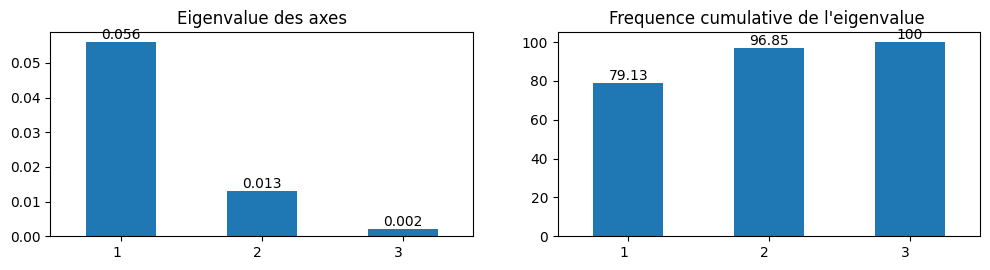

In [ ]:
eig = pd.DataFrame(afc.eig_)

r1 = round(eig.iloc[0], 3)
r2 = round(eig.iloc[2], 2)
s=list(range(1,len(r1)+1))
r1.index=s
r2.index=s

# https://www.statology.org/pandas-subplots/
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax1 = r1.plot(kind='bar', ax=axes[0], title='Eigenvalue des axes')
ax2 = r2.plot(kind='bar', ax=axes[1], title="Frequence cumulative de l'eigenvalue ")


ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])


# Met les valeurs xticks en vertical
fig.autofmt_xdate(rotation=0)
plt.show()

NB: la valeur propre des axes (eigenvalue) est la valeur de la variance exprimée par ce axe. Il s'agit donc d'une portion du phi-2, i.e. du chi-2 divisé par le nombre d'individus de la population. 100% de la variance équivaut au phi-2.
<br/>

## Graphiques et interprétation du premier plan factoriel

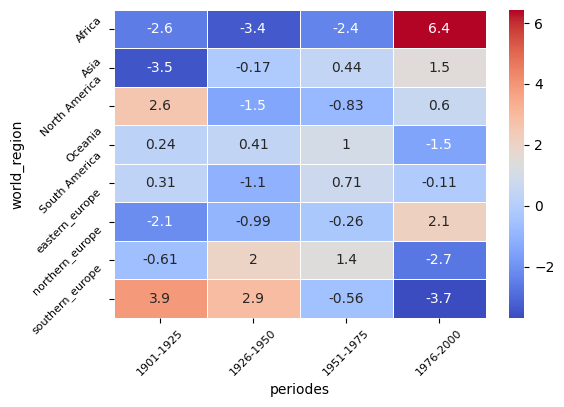

In [ ]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index


fig, ax = plt.subplots(figsize=(6,4))
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=45, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=45, fontsize=8)




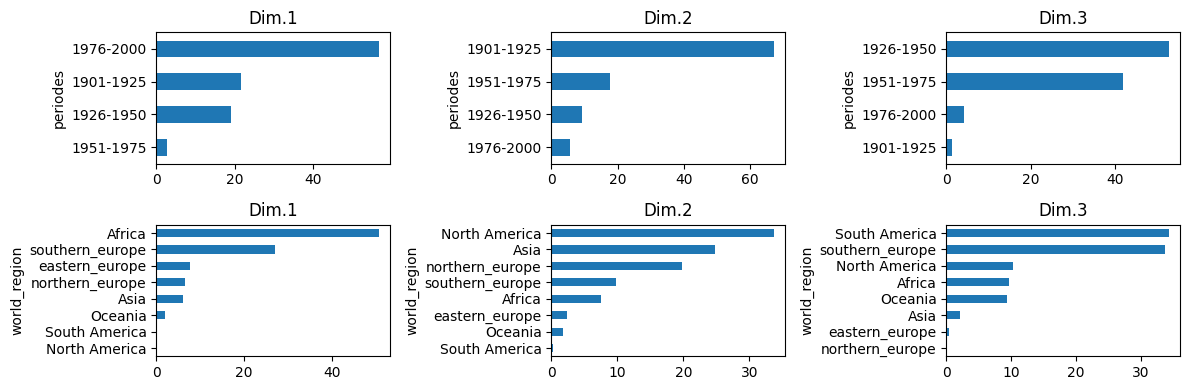

In [ ]:
# Informations sur les contributions des colonnes
df = afc.col_topandas()[['col_contrib_dim1',
                         'col_contrib_dim2',
                         'col_contrib_dim3']]

r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,4))

r1.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[0,2], title='Dim.3')

### Rows
df = afc.row_topandas()[['row_contrib_dim1',
                         'row_contrib_dim2',
                         'row_contrib_dim3']]
r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

r1.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[1,2], title='Dim.3')

plt.tight_layout()
plt.show()


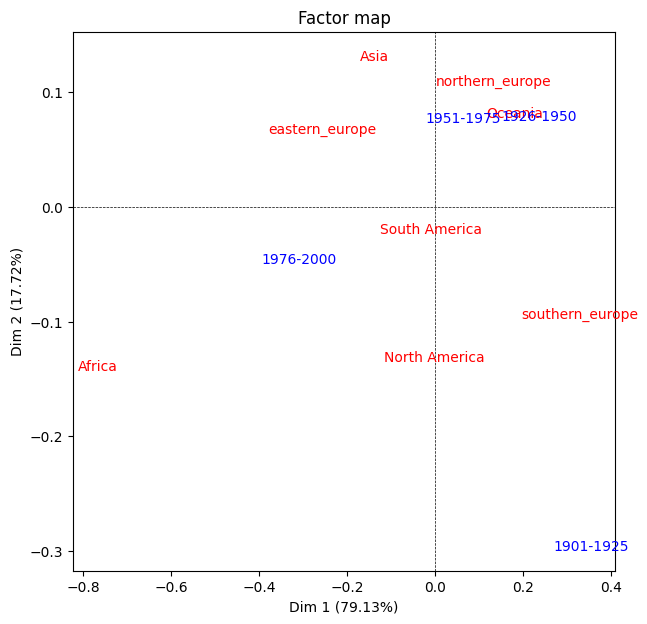

In [ ]:
# Représentation simultanée, avec amplification
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

## Représenter l'autre plan factoriel

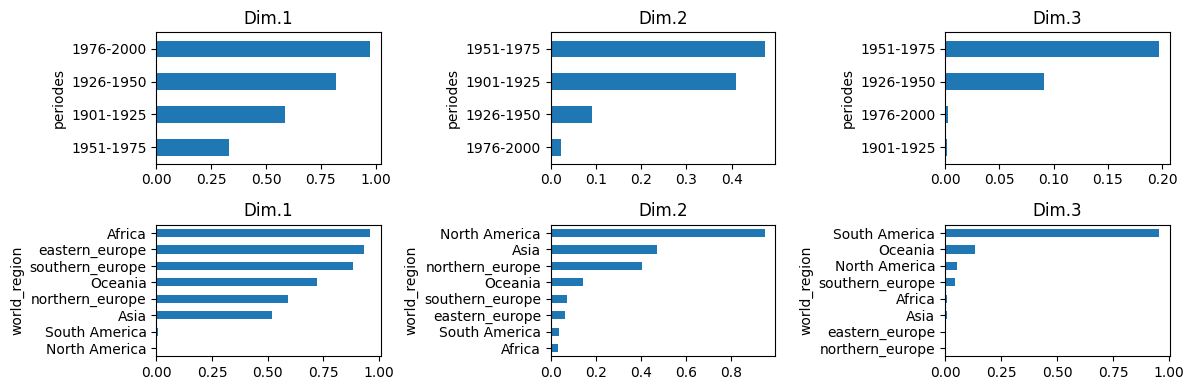

In [ ]:
### Informations sur les cosinus carrés. Ces valeurs expriment
# la qualité de représentation d'une modalité sur l'axe correspondant

### Colonnes
df = afc.col_topandas()[['col_cos2_dim1',
                         'col_cos2_dim2',
                         'col_cos2_dim3']]

r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,4))

r1.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[0,2], title='Dim.3')

### Lignes
df = afc.row_topandas()[['row_cos2_dim1',
                         'row_cos2_dim2',
                         'row_cos2_dim3']]
r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

r1.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[1,2], title='Dim.3')

plt.tight_layout()
plt.show()

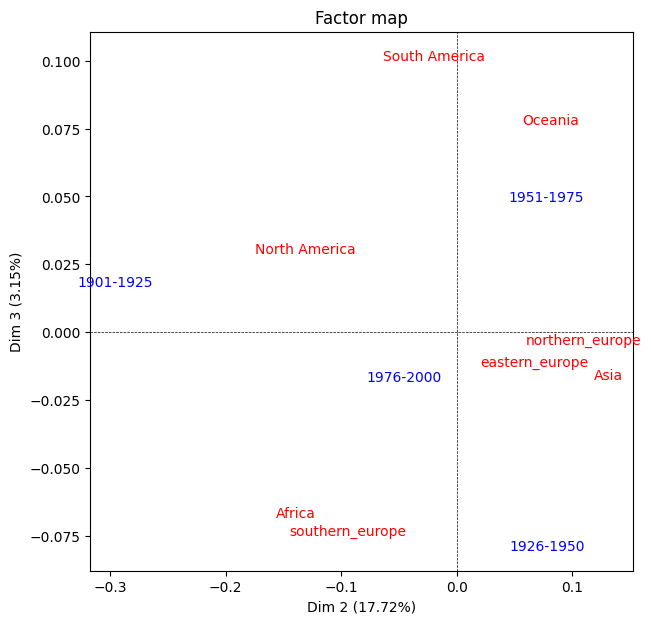

In [ ]:
# Représentation simultanée, avec amplification
afc.mapping(num_x_axis=2,num_y_axis=3,figsize=(7,7))